# Tiziano basics - simple geometry creation
## In this first tutorial, tiziano basic functionalities are shown.

### Tiziano is a python tool to create 2D mesh models.

 Tiziano provides methods to generate **geometry-coherent 2D drawings** and get  
 mesh files from them to be used for numerical computing, i.e. Finite Elements  
 (FEM), Integral Methods (PEEC, BEM, MOM, etc...).  
 Tiziano takes advantage of **triangle mesher** through its pytriangle interface  
 and it generates mesh files in **gmsh 2.2 format**.  

 Tiziano can also create **dxf files of 2D geometries** to be used by other meshers  
 along with different numerical solvers, or even for other purposes than  
 numerical computing. Anyway, you have to keep in mind that tiziano is intended  
 to create 2D geometries from **Python scripting**. So, a *basic knowledge of  
 Python is needed*. Then, for an effective and easier use of tiziano, **you should  
 know very well what you are going to draw**.

 It is important that you plan carefully your python script with tiziano *before*  
 start typing. Otherwise, you may go mad and hate tiziano.  
 We hope that tiziano could be a good choice for automatic generation of mesh  
 models for numerical computing. On the other hand, tiziano is not suitable to draw  
 following a GUI-like process.

### In this tutorial the following fundamental topics are covered:  
 0. tiziano drawing initialization;
 1. how to add points and lines to a tiziano drawing;
 2. basic selection methods in tiziano;
 3. what geometry **coherence** means in tiziano drawings;
 4. how to add arcs to a tiziano drawing;
 5. how to remove points and lines from a tiziano drawing;
 6. how to add labels and holes to a tiziano drawing;
 7. how to generate a mesh file from a tiziano drawing.


In [1]:
import math
from dolomites import tiziano


### 0. Tiziano drawing initialization

In [2]:
draw = tiziano.drawing()


A tiziano drawing instance consists in four fundamental lists, one for each  
**fundamental geometry entitiy** of tiziano:  
- a list for **points**;
- a list for **lines**;
- a list for **labels**;
- a list for **holes**.

There is also a single *selection list* that can be useful for geometry  
transformations (rotations, traslations), visualization and debugging.


In [3]:
# Now, all lists are empty as no geometry object has been added to the drawing
print('Fundamental lists--------------------------------')
print('List of points in the drawing:\n ', draw.points)
print('List of lines in the drawing:\n ', draw.lines)
print('List of labels in the drawing:\n ', draw.labels)
print('List of holes in the drawing:\n ', draw.holes)
print('-------------------------------------------------')
print('Selection list of the drawing:\n ', draw.selected)


Fundamental lists--------------------------------
List of points in the drawing:
  []
List of lines in the drawing:
  []
List of labels in the drawing:
  []
List of holes in the drawing:
  []
-------------------------------------------------
Selection list of the drawing:
  []


### 1. How to add points and lines to a tiziano drawing

 Points and lines can be easily added to a drawing with **add_point** and  
 **add_line** methods, respectively.  
 Points and lines in the drawing can be accessed every time from drawing  
 fundamental lists (drawing.points, drawing.lines), as well as their **key  
 properties**.

 **Point**  
 - point.x, point.y : point coordinates
 - point.ph : point physical tag (optional)


 **Line**  
 - line.n1, line.n2 : line endpoints
 - line.ph : line physical tag (optional)


 **Physical tags** are identifiers useful for further finite element  
 or integral methods computations on the mesh model.


-------------------------------------------------
First point added to drawing:  point at: (1, 0, -1)
Second point added to drawing:  point at: (-1, 0, -1)
-------------------------------------------------
Generated lines:  [line from (point at: (1, 0, -1)) to (point at: (-1, 0, -1)). Physical tag: 12]
First line:  line from (point at: (1, 0, -1)) to (point at: (-1, 0, -1)). Physical tag: 12
-------------------------------------------------
List of points in the drawing:
  [point at: (1, 0, -1), point at: (-1, 0, -1)]
List of lines in the drawing:
  [line from (point at: (1, 0, -1)) to (point at: (-1, 0, -1)). Physical tag: 12]
-------------------------------------------------


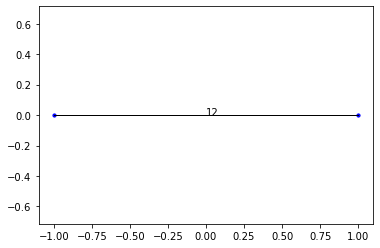

In [4]:
# A point can be easily added to a drawing with add_point method using
# cartesian coordinates.
p1 = draw.add_point(1, 0)
p2 = draw.add_point(-1, 0)
# As default behaviour, add_point returns the newly generated point instance
print('-------------------------------------------------')
print('First point added to drawing: ', p1)
print('Second point added to drawing: ', p2)
print('-------------------------------------------------')
# A line can be easily added to a drawing with **add_line** method using
# line endpoints. Endpoints must be already added to the drawing. An optional
# physical tag can be set.
l12 = draw.add_line(p1, p2, 12)
# As default behaviour, add_line returns a LIST of newly generated lines
print('Generated lines: ', l12)
print('First line: ', l12[0])
# Now in fundamental drawing lists two points and one line have been added
print('-------------------------------------------------')
print('List of points in the drawing:\n ', draw.points)
print('List of lines in the drawing:\n ', draw.lines)
print('-------------------------------------------------')
# The drawing can be visualize in matplotlib.pyplot using plot method
draw.plot()


First point:  point at: (1, 0, 1)
First point physical tag:  1
Second point:  point at: (-1, 0, 2)
Second point physical tag:  2
-------------------------------------------------


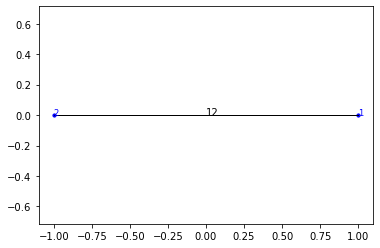

In [5]:
# Points and lines with their related key properties can be accessed every time
# from objects returned by add_point and add_line methods or from
# fundamental drawing lists.
# A useful case is when one wants to assign a physical tag to geometry objects
# already in the drawing.
p1.ph_tag = 1  # from object returned by add_point method
print('First point: ', p1)
print('First point physical tag: ', p1.ph_tag)
draw.points[1].ph_tag = 2  # from drawing points list
print('Second point: ', draw.points[1])
print('Second point physical tag: ', draw.points[1].ph_tag)
print('-------------------------------------------------')
draw.plot()


drawing.add_point() --> point at ( -1 , 0 ) already in the drawing.
Point already in the drawing:  point at: (-1, 0, 2)
List of points in the drawing:
  [point at: (1, 0, 1), point at: (-1, 0, 2)]
drawing.add_line() -->  line from (point at: (1, 0, 1)) to (point at: (-1, 0, 2)). Physical tag: 12  already in the drawing.
Returned lines:  [line from (point at: (1, 0, 1)) to (point at: (-1, 0, 2)). Physical tag: 12]
List of lines in the drawing:
  [line from (point at: (1, 0, 1)) to (point at: (-1, 0, 2)). Physical tag: 12]
-------------------------------------------------


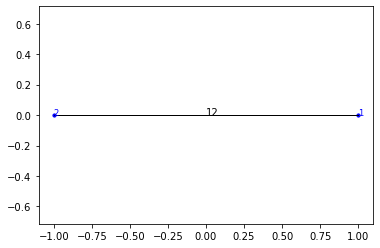

In [6]:
# If one try to add a new point at the same coordinates where a point already
# exists in the drawing,
p0 = draw.add_point(-1, 0)
# then, no new point is added and the point already in the drawing is returned
print('Point already in the drawing: ', p0)
print('List of points in the drawing:\n ', draw.points)
# On the other hand, in the case of lines,
# no new lines are added to the drawing,
l00 = draw.add_line(p2, p1)
# but, differently from points, lines already to the drawing are not returned.
# (Indeed, add_line method returns newly generated lines only!)
print('Returned lines: ', l00)
print('List of lines in the drawing:\n ', draw.lines)
print('-------------------------------------------------')
draw.plot()


 It is importan to point out that geometry objects are related only to the  
 drawing instance which in they are generated.

### Different tiziano drawing instances are separated python objects!


-------------------------------------------------
First tiziano drawing

               drawing with:
               2 points
               1 lines
               0 labels
               0 holes)
               
[point at: (1, 0, 1), point at: (-1, 0, 2)]
[line from (point at: (1, 0, 1)) to (point at: (-1, 0, 2)). Physical tag: 12]


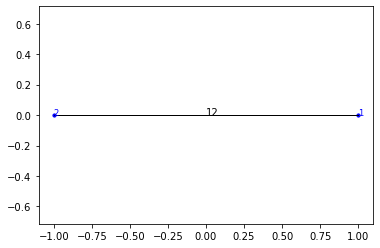

-------------------------------------------------
Second tiziano drawing

               drawing with:
               2 points
               1 lines
               0 labels
               0 holes)
               
[point at: (0, 1, 1), point at: (0, -1, 2)]
[line from (point at: (0, 1, 1)) to (point at: (0, -1, 2)). Physical tag: 12]


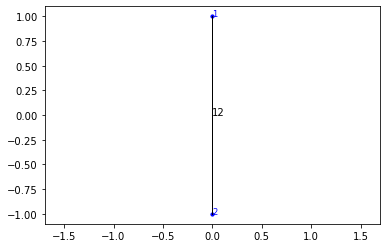

In [7]:
# new drawing instance
draw_1 = tiziano.drawing()

# add points and lines to new drawing instance
p1 = draw_1.add_point(0, 1, 1)
p2 = draw_1.add_point(0, -1, 2)
l12 = draw_1.add_line(p1, p2, 12)

# Different tiziano drawing instances are separated python objects!
print('-------------------------------------------------')
print('First tiziano drawing')
print(draw)
print(draw.points)
print(draw.lines)
draw.plot()
print('-------------------------------------------------')
print('Second tiziano drawing')
print(draw_1)
print(draw_1.points)
print(draw_1.lines)
draw_1.plot()


In [8]:
draw.clear()

In [9]:
del draw_1

Empty drawing.


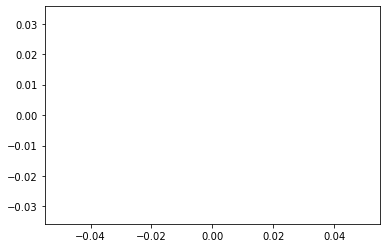

[]
[]


In [10]:
# Now first drawing is empty again
print('Empty drawing.')
draw.plot()
print(draw.points)
print(draw.lines)
# whereas second drawing exists no more.


Drawing with key points


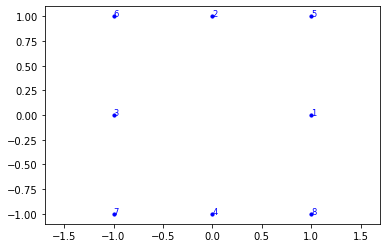

In [11]:

# We can use smarter programming ways to generate drawings by combining Tiziano
# methods with usual python lists methods.
x = [1, 0, -1, 0, 1, -1, -1, 1]  # coordinates lists
y = [0, 1, 0, -1, 1, 1, -1, -1]

key_pts = []  # list for key points

for ii, xx in enumerate(x):
    key_pts.append(draw.add_point(xx, y[ii], ii+1))
# Note that we have to use list.append method for add_point as it returns
# a single tiziano point instance
print('Drawing with key points')
draw.plot()


Drawing with key points and lines


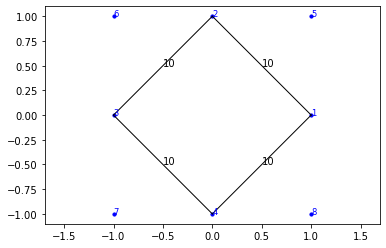

In [12]:
key_lns = []  # list for key lines
for ii in range(3):
    key_lns.extend(draw.add_line(key_pts[ii], key_pts[ii+1], 10))
key_lns.extend(draw.add_line(key_pts[3], key_pts[0], 10))
# Note that we have to use list.extend method for add_line as it returns
# a LIST of tiziano line instances
print('Drawing with key points and lines')
draw.plot()


### 2. Basic selection methods in tiziano

 Tiziano provides five different selection methods.

 In this first tutorial, three of them are used only for presentation and  
 visualization purposes.

 All selection methods make *shallow* copies of selected objects in a drawing  
 and put them in selection list. They can act on all tiziano objects, i.e.  
 points, lines, labels, holes.

 Since tiziano geometry objects can be easily accessed from fundamental drawing  
 lists and/or user defined lists, their use is discouraged, also because they  
 are quite time-consuming.


Drawing selection list at the beginning:
  []
Drawing selection list after complete objects selection:
  [point at: (1, 0, 1), point at: (0, 1, 2), point at: (-1, 0, 3), point at: (0, -1, 4), point at: (1, 1, 5), point at: (-1, 1, 6), point at: (-1, -1, 7), point at: (1, -1, 8), line from (point at: (1, 0, 1)) to (point at: (0, 1, 2)). Physical tag: 10, line from (point at: (0, 1, 2)) to (point at: (-1, 0, 3)). Physical tag: 10, line from (point at: (-1, 0, 3)) to (point at: (0, -1, 4)). Physical tag: 10, line from (point at: (0, -1, 4)) to (point at: (1, 0, 1)). Physical tag: 10]
List of all objects in the drawing:
  [point at: (1, 0, 1), point at: (0, 1, 2), point at: (-1, 0, 3), point at: (0, -1, 4), point at: (1, 1, 5), point at: (-1, 1, 6), point at: (-1, -1, 7), point at: (1, -1, 8), line from (point at: (1, 0, 1)) to (point at: (0, 1, 2)). Physical tag: 10, line from (point at: (0, 1, 2)) to (point at: (-1, 0, 3)). Physical tag: 10, line from (point at: (-1, 0, 3)) to (point at:

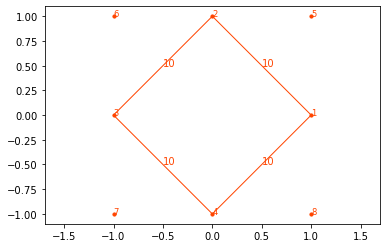

In [13]:
# Now, drawing selection list is empty
print('Drawing selection list at the beginning:\n ', draw.selected)
# User defined list of tiziano objects (points and lines)
key_obj = key_pts + key_lns
# Select all tiziano objects in the drawing with select_all method
all_obj = draw.select_all()
# Now, all objects (only points and lines in this case) in the drawing have been
# copied to selection list and returned to used defined all_obj list
print('Drawing selection list after complete objects selection:\n ',
       draw.selected)
print('List of all objects in the drawing:\n ', all_obj)
# Objects in selection list are highlighted in pyplot visualization
draw.plot()


Drawing selection list after clear_selected method:
  []


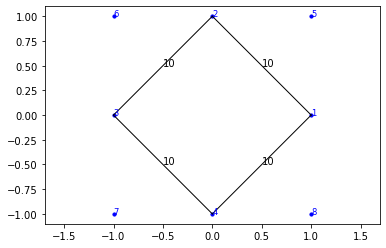

In [14]:
draw.clear_selected()
print('Drawing selection list after clear_selected method:\n ', draw.selected)
draw.plot()


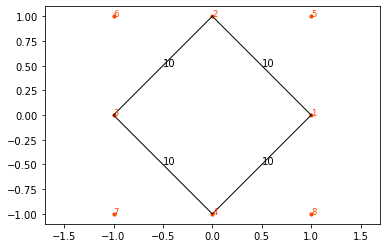

In [15]:
# In some selection methods, as well as in other tiziano drawing methods,
# geometry entities on which to perform actions can be specified by kwarg
# **entity**:
# -1: (default) all input objects
#  0: only points
#  1: only lines
#  2: only labels and holes
all_pts = draw.select_all(entity=0)
draw.plot()
draw.clear_selected()


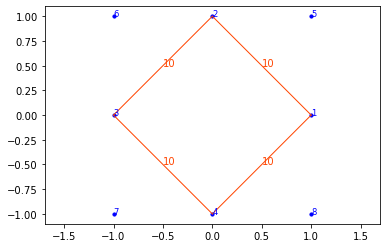

In [16]:
all_lns = draw.select_all(entity=1)
draw.plot()
draw.clear_selected()


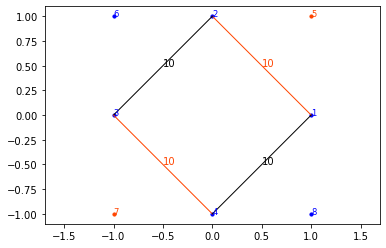

In [17]:
# Do this with select method. This method selects all objects (points, lines,
# labels, holes) inside a given input list.
obj_select = key_pts[4:7:2] + key_lns[0:3:2]  # input list for select method
obj_select = draw.select(obj_select)
draw.plot()
draw.clear_selected()


### 3. What geometry **coherence** means in tiziano

 Geometry coherence is a fundamental property that must be achieved to get a  
 proper mesh from triangle mesher. It is primarily related to points and lines.

 Coherence is codify into **two rules**:  
 **1**. a line cannot intersecate points without being splitted in multiple lines  
 **2**. lines cannot intersecate between each other without being splitted in  
    multiple lines with the generation of points at the intersections

 Let's see how geometry coherence works in tiziano with a couple of examples on  
 our trial drawing.


drawing.add_line() -->  point at: (1, 0, 1)  already in the drawing is on  line from (point at: (1, 1, 5)) to (point at: (1, -1, 8)). Physical tag: 1000 . Splitting the line...
Newly generated lines:
  [line from (point at: (1, 1, 5)) to (point at: (1, 0, 1)). Physical tag: 1000, line from (point at: (1, 0, 1)) to (point at: (1, -1, 8)). Physical tag: 1000]
-------------------------------------------------


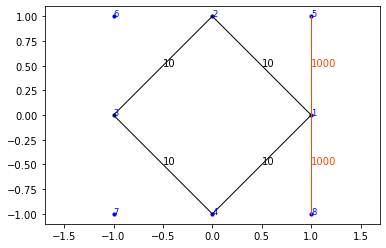

In [18]:
# Now, we want to add a line between point 5 and 8
l_out = draw.add_line(key_pts[4], key_pts[-1], 1000)
# Two lines are added to the drawing and returned in l_out list, becuase line from
# point 5 to point 6 intersecates point 2, thus it was splitted into two lines
# to achieve geometry coherence
print('Newly generated lines:\n ', l_out)
print('-------------------------------------------------')
l_out = draw.select(l_out)  # selection for visualization purpose
draw.plot()
draw.clear_selected()


drawing.add_line() -->  point at: (0, 1, 2)  already in the drawing is on  line from (point at: (1, 1, 5)) to (point at: (-1, 1, 6)). Physical tag: 1000 . Splitting the line...
drawing.add_line() -->  point at: (-1, 0, 3)  already in the drawing is on  line from (point at: (-1, 1, 6)) to (point at: (-1, -1, 7)). Physical tag: 1000 . Splitting the line...
drawing.add_line() -->  point at: (0, -1, 4)  already in the drawing is on  line from (point at: (-1, -1, 7)) to (point at: (1, -1, 8)). Physical tag: 1000 . Splitting the line...


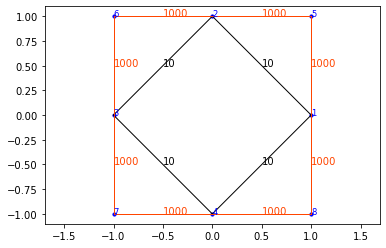

In [19]:
for ii, pp in enumerate(key_pts[4:-1], start=4):
    l_out.extend(draw.add_line(pp, key_pts[ii+1], 1000))
draw.select(l_out)
draw.plot()
draw.clear_selected()


0
drawing.add_point() -->  point at: (0.5, 0.5, -1)  is on a line. Splitting  line from (point at: (1, 0, 1)) to (point at: (0, 1, 2)). Physical tag: 10 ...
1
drawing.add_point() -->  point at: (-0.5, 0.5, -1)  is on a line. Splitting  line from (point at: (0, 1, 2)) to (point at: (-1, 0, 3)). Physical tag: 10 ...
2
drawing.add_point() -->  point at: (-0.5, -0.5, -1)  is on a line. Splitting  line from (point at: (-1, 0, 3)) to (point at: (0, -1, 4)). Physical tag: 10 ...
3
drawing.add_point() -->  point at: (0.5, -0.5, -1)  is on a line. Splitting  line from (point at: (0, -1, 4)) to (point at: (1, 0, 1)). Physical tag: 10 ...
Selection list:
  [line from (point at: (1, 0, 1)) to (point at: (0.5, 0.5, -1)). Physical tag: 10, line from (point at: (0.5, 0.5, -1)) to (point at: (0, 1, 2)). Physical tag: 10, line from (point at: (0, 1, 2)) to (point at: (-0.5, 0.5, -1)). Physical tag: 10, line from (point at: (-0.5, 0.5, -1)) to (point at: (-1, 0, 3)). Physical tag: 10, line from (point a

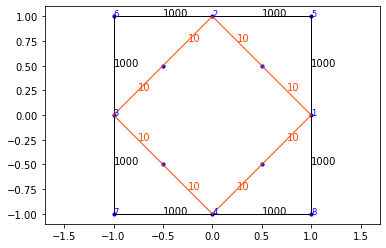

Selection list:
  []
-------------------------------------------------


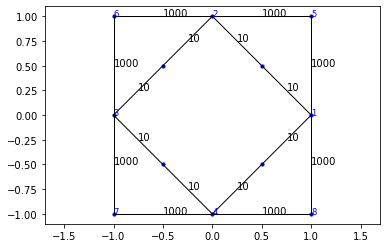

In [20]:
# Coherence rule 1 works when points are added over lines too.
x_i = [0.5, -0.5, -0.5,  0.5]
y_i = [0.5,  0.5, -0.5, -0.5]
new_key_lns = []
for ii, xx in enumerate(x_i):
    print(ii)
    pt, lns = draw.add_point(xx, y_i[ii], get_lns=True)
    key_pts.append(pt)
    new_key_lns.extend(lns)
# add_point can also return a list of lines generated by intersections when kwarg
# get_lns is set to True (default False)
# Note that now lines inside old key_lns list exists no more in the drawing, i.e.
# they have been replaced in drawing lines list (draw.lines) by new_key_lns
# generated by points-lines intersections.
draw.select(new_key_lns)
print('Selection list:\n ', draw.selected)
print('-------------------------------------------------')
draw.plot()
draw.clear_selected()
draw.select(key_lns)
print('Selection list:\n ', draw.selected)
print('-------------------------------------------------')
draw.plot()

drawing.add_line() -->  point at: (0.5, 0.5, -1)  already in the drawing is on  line from (point at: (1, 1, 5)) to (point at: (-1, -1, 7)). . Splitting the line...
drawing.add_line() -->  point at: (-0.5, -0.5, -1)  already in the drawing is on  line from (point at: (0.5, 0.5, -1)) to (point at: (-1, -1, 7)). . Splitting the line...


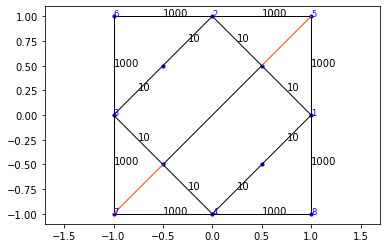

-------------------------------------------------


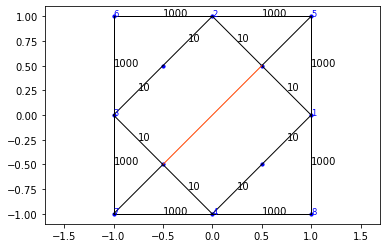

In [21]:
l2 = draw.add_line(key_pts[4], key_pts[6])
draw.select([l2[0], l2[-1]])
draw.plot()
draw.clear_selected()
print('-------------------------------------------------')
draw.select([l2[1]])
draw.plot()
draw.clear_selected()


drawing.add_line() -->  point at: (-0.5, 0.5, -1)  already in the drawing is on  line from (point at: (-1, 1, 6)) to (point at: (1, -1, 8)). . Splitting the line...
drawing.add_line() -->  point at: (0.5, -0.5, -1)  already in the drawing is on  line from (point at: (-0.5, 0.5, -1)) to (point at: (1, -1, 8)). . Splitting the line...
drawing.add_point() -->  point at: (0.0, 0.0, -1)  is on a line. Splitting  line from (point at: (0.5, 0.5, -1)) to (point at: (-0.5, -0.5, -1)). ...
drawing.add_point() -->  point at: (0.0, 0.0, -1)  is on a line. Splitting  line from (point at: (-0.5, 0.5, -1)) to (point at: (0.5, -0.5, -1)). ...


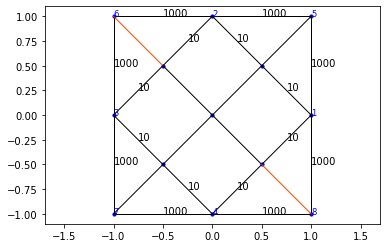

-------------------------------------------------


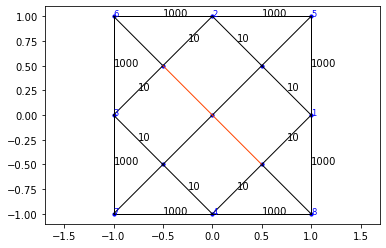

-------------------------------------------------


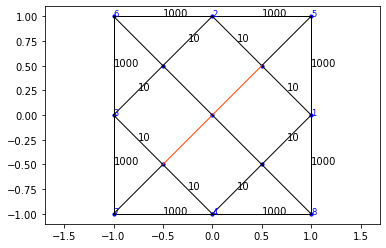

-------------------------------------------------


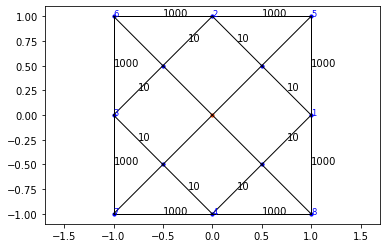

In [22]:
l3, int_p = draw.add_line(key_pts[5], key_pts[7], get_pts=True)
# Note that add_line returns a line LIST containing ALL the newly generated lines,
# even those created by intersections with other points and lines!
# With the kwarg get_pts set to True (default False), add_line returns also a LIST
# of points generated by intersections with other lines.
# Note also that now the second element of line list l2 (l2[1]) has been replaced
# by second and thid element of list l3 (l3[1], l3[2]).
draw.select([l3[0], l3[-1]])
draw.plot()
draw.clear_selected()
print('-------------------------------------------------')
draw.select([l3[3], l3[4]])
draw.plot()
draw.clear_selected()
print('-------------------------------------------------')
draw.select([l3[1], l3[2]])
draw.plot()
draw.clear_selected()
print('-------------------------------------------------')
draw.select(int_p)
draw.plot()
draw.clear_selected()


## N.B.
 By default, intersections are checked every time add_point and add_line  
 methods are called. Coherence checks are quite costly in terms of computational  
 time especially when generating drawings with a lot of points and lines.  
 However, they are needed to solve intersections properly.  

 Coherence checks can be disabled by setting kwarg coherence=False in add_point  
 and add_line calls. This is not recommended for beginners, whereas it is very  
 convenient for advanced users of tiziano, as this trick fastens significantly  
 code execution and geometry creation, especially for large drawings. Anyway, when  
 coherence checks are disabled, a particular care must be taken to avoid intersections.  
 Otherwise, the geometry model will be unsuitable for meshing.


### 4. How to add arcs in tiziano

 An arc can be added to a tiziano drawing using **add_arc** method. **Arcs are  
 immediately discretized into multiple points and lines.**  
 So, in tiziano arc objects do not exist (differently from points and lines, in  
 tiziano an arc class has not been implemented).

 Obviously, coherence works also for lines and points created from discretized arcs.


drawing.add_point() -->  point at: (0.34920056166685515, 0.34920056166685515, -1)  is on a line. Splitting  line from (point at: (0.5, 0.5, -1)) to (point at: (0.0, 0.0, -1)). ...
drawing.add_point() -->  point at: (0.34920056166685515, 0.34920056166685515, -1)  is on a line. Splitting  line from (point at: (0.4045084971874737, 0.29389262614623657, -1)) to (point at: (0.29389262614623657, 0.4045084971874737, -1)). Physical tag: 11 ...
drawing.add_point() -->  point at: (-0.3492005616668551, 0.3492005616668551, -1)  is on a line. Splitting  line from (point at: (-0.5, 0.5, -1)) to (point at: (0.0, 0.0, -1)). ...
drawing.add_point() -->  point at: (-0.3492005616668551, 0.3492005616668551, -1)  is on a line. Splitting  line from (point at: (-0.2938926261462365, 0.4045084971874737, -1)) to (point at: (-0.40450849718747367, 0.2938926261462366, -1)). Physical tag: 11 ...


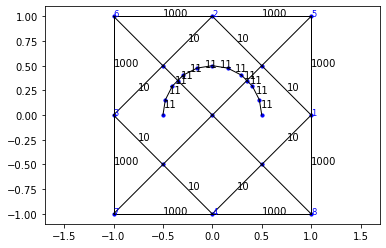

drawing.add_point() -->  point at: (-0.3492005616668551, -0.3492005616668551, -1)  is on a line. Splitting  line from (point at: (0.0, 0.0, -1)) to (point at: (-0.5, -0.5, -1)). ...
drawing.add_point() -->  point at: (-0.3492005616668551, -0.3492005616668551, -1)  is on a line. Splitting  line from (point at: (-0.4045084971874737, -0.2938926261462365, -1)) to (point at: (-0.2938926261462366, -0.40450849718747367, -1)). Physical tag: 11 ...
drawing.add_point() -->  point at: (0.34920056166685515, -0.34920056166685515, -1)  is on a line. Splitting  line from (point at: (0.0, 0.0, -1)) to (point at: (0.5, -0.5, -1)). ...
drawing.add_point() -->  point at: (0.34920056166685515, -0.34920056166685515, -1)  is on a line. Splitting  line from (point at: (0.29389262614623646, -0.4045084971874738, -1)) to (point at: (0.40450849718747367, -0.2938926261462367, -1)). Physical tag: 11 ...


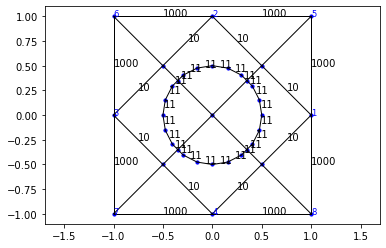

In [23]:
# arc starting and ending points must be already in the drawing
start = draw.add_point(0.5, 0)   # arc starting point
end   = draw.add_point(-0.5, 0)  # arc ending point
# span angle and discretized angle must be given in radians
# a maximum span angle of 180 degree = pi radians can be given
# arcs' angles are positive in counterclockwise direction
arc1_pts, arc1_lns = draw.add_arc(start, end, math.pi, math.pi/10, ph=11)
draw.plot()
arc2_pts, arc2_lns = draw.add_arc(end, start, math.pi, math.pi/10, ph=11)
# the above command is equal to
# arc2_pts, arc2_lns = draw.add_arc(start, end, -math.pi, math.pi/10)
draw.plot()


drawing.add_line() -->  point at: (0.0, 0.0, -1)  already in the drawing is on  line from (point at: (0, 1, 2)) to (point at: (0, -1, 4)). Physical tag: 40 . Splitting the line...
drawing.add_line() -->  point at: (3.061616997868383e-17, 0.5, -1)  already in the drawing is on  line from (point at: (0, 1, 2)) to (point at: (0.0, 0.0, -1)). Physical tag: 40 . Splitting the line...
drawing.add_line() -->  point at: (-9.184850993605148e-17, -0.5, -1)  already in the drawing is on  line from (point at: (0.0, 0.0, -1)) to (point at: (0, -1, 4)). Physical tag: 40 . Splitting the line...
drawing.add_line() -->  point at: (0.0, 0.0, -1)  already in the drawing is on  line from (point at: (1, 0, 1)) to (point at: (-1, 0, 3)). Physical tag: 50 . Splitting the line...
drawing.add_line() -->  point at: (0.5, 0, -1)  already in the drawing is on  line from (point at: (1, 0, 1)) to (point at: (0.0, 0.0, -1)). Physical tag: 50 . Splitting the line...
drawing.add_line() -->  point at: (-0.5, 0, -1)  al

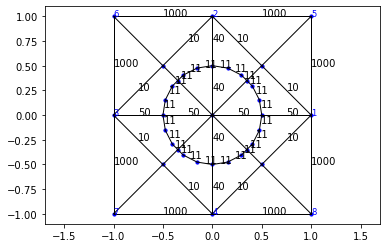

In [24]:
l4 = draw.add_line(key_pts[1], key_pts[3], 40)
l5 = draw.add_line(key_pts[0], key_pts[2], 50)
draw.plot()


### 5. How to remove points and lines from a tiziano drawing

 Points and lines can be removed from a tiziano drawing while creating a 2D geometry.

 To remove points the method remove_point is recommended in order to preserve  
 coherence. Indeed, remove_point removes the points in a given input list from  
 drawing and *all the connected lines*, i.e. all lines that are such points as their endpoints.

 Instead, lines can be safely and esily removed directly from the drawing lines list.

 The use of such techniques is discouraged for advanced users, as their are quite  
 inefficient. Moreover, if one knows well what he/she has to draw, points and lines  
 removing can be always avoided.


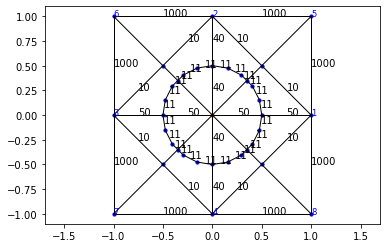

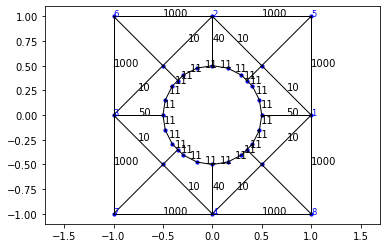

In [25]:
# If a list of points is passed to remove_point, then those points are removed
# from the drawing along with their connected lines (to preserve coherence).
draw.select(int_p)
draw.plot()
draw.clear_selected()
draw.remove_point(int_p)
# remove_point returns nothing
draw.plot()


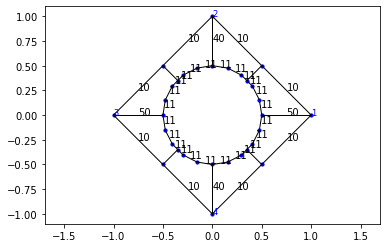

In [26]:
# One can remove all points and connected lines outside a certain radius from origin
# by using remove_point method with proper inputs and kwargs
draw.remove_point(1.1, mode='>')
draw.plot()

 **remove_point** can be used in various ways.

### Look at the method's docstring to learn more.


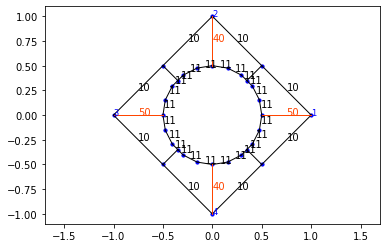

In [27]:
# Select lines to remove (only to visualize them! not needed in practic coding)
lns_toremove = draw.select([l4[0], l4[-1], l5[0], l5[-1]])
draw.plot()
draw.clear_selected()


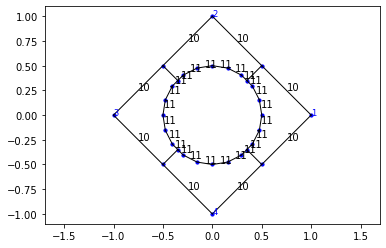

In [28]:
for ll in lns_toremove:
    draw.lines.remove(ll)  # lines can be safely removed directly from drawing list
draw.plot()


### 6. How to add labels and holes to a tiziano drawing

 *Labels* are objects stricly needed to generate a mesh file with triangle mesher.  
 Labels can be added to a tiziano drawing with the add_label method. A **physical tag**  
 greater than 0 (positive integer) must be assigned to  label. *Another parameter is  
 **mandatory** for labels*: it represents the maximum size for mesh triangles' areas  
 in that drawing region.

 *Holes* instead are used to indicate **No-Mesh** regions to triangle mesher, thus they  
 do nor require any other inputs than position coordinates. They can e added to  
 a tiziano drawing wiht add_hole method.

 To get a proper mesh model, **one and only one label or hole must be assigned  
 in each drawing closed region**. Otherwise, the mesher will crash when trying to  
 create a mesh file. Checks for this rule are not implemented in tiziano yet.  
 So, it is up to the designer to assign labels and holes properly.


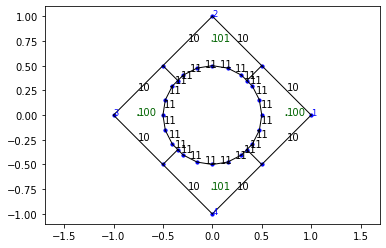

In [29]:
# labels coordinates
xl = [0.75, 0.00, -0.75,  0.00]
yl = [0.00, 0.75,  0.00, -0.75]
ph_lab   = [ 100,   101,  100,   101]  # labels physical tags
size_lab = [0.01, 0.005, 0.01, 0.005]  # labels mesh sizes
labs = []  # list for labels (not needed, only for presentation purposes!)
for ii, xx in enumerate(xl):
    # add_label method reuturns the newly created label
    labs.append(draw.add_label(xx, yl[ii], ph_lab[ii], size_lab[ii]))
draw.plot()


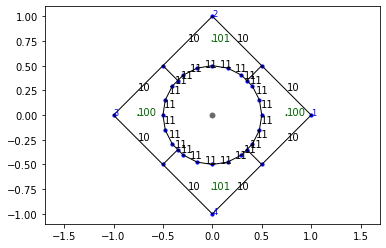

Labels in drawing:
  [label at: (0.75, 0.0, 100), label at: (0.0, 0.75, 101), label at: (-0.75, 0.0, 100), label at: (0.0, -0.75, 101)]
-------------------------------------------------
Holes in drawing:
  [hole at: (0, 0)]
-------------------------------------------------


In [30]:
hol = draw.add_hole(0, 0)  # add_hole returns the newly generated hole
draw.plot()
print('Labels in drawing:\n ', draw.labels)
print('-------------------------------------------------')
print('Holes in drawing:\n ', draw.holes)
print('-------------------------------------------------')


### 7. How to generate a mesh model from a tiziano drawing

 From a tiziano drawing instance it is possible to generate a mesh file in gmsh  
 2.2 format. To to do so, two step are neede:  
 1. call triangle mesher to create a mesh object (mesh_triangle method)  
 2. save the triangle mesh object as gmsh 2.2 (save_mesh method).


In [31]:
# 1. call triangle mesher to create a mesh object
# mesh_triangle does not accept any argument, but it returns an accessible mesh
# object when triangle mesher does not crash
mesh = draw.mesh_triangle()
# 2. save the triangle mesh object as gmsh 2.2
# in save_mesh a vaild filename must be specified (extension .msh is mandatory!)
# mesh file is saved in current working directory if a complete path is not specified
draw.save_mesh('tiziano_tutorial_1.msh')


This image shows the trial mesh model just created.  
It was taken from [Onelab](http://onelab.info/) Gmsh interface.
![tutorial 1 - mesh model](tiziano_tutorial_01.png)